option data from http://www.cboe.com/

- https://www.historicaloptiondata.com/content/sample-files-0

- https://www.historicaloptiondata.com/content/level-3-hdfive-five-years-option-history-csv-format

- https://www.historicaloptiondata.com/content/historical-options-data-file-structures


In [2]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import matplotlib.dates as md
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import pandas as pd

%matplotlib inline

In [3]:
options = pd.read_csv("../../../data/L3_optionstats_20131101.part.csv")

In [4]:
options.head()

UnderlyingSymbol  UnderlyingPrice Flags         OptionSymbol  Type  \
0             AAPL           520.03     W  AAPL131101C00355000  call   
1             AAPL           520.03     W  AAPL131101P00355000   put   
2             AAPL           520.03     W  AAPL131101C00360000  call   
3             AAPL           520.03     W  AAPL131101P00360000   put   
4             AAPL           520.03     W  AAPL131101C00365000  call   

   Expiration    DataDate  Strike  Last    Bid         ...           \
0  11/01/2013  11/01/2013   355.0  0.00  164.1         ...            
1  11/01/2013  11/01/2013   355.0  0.01    0.0         ...            
2  11/01/2013  11/01/2013   360.0  0.00  159.1         ...            
3  11/01/2013  11/01/2013   360.0  0.08    0.0         ...            
4  11/01/2013  11/01/2013   365.0  0.00  154.1         ...            

   OpenInterest  T1OpenInterest  IVMean  IVBid  IVAsk  Delta  Gamma  Theta  \
0             0               0     0.0    0.0    0.0    0.0    0.0    0.0   
1           195               0     0.0    0.0    0.0    0.0    0.0    0.0   
2             0               0     0.0    0.0    0.0    0.0    0.0    0.0   
3           160               0     0.0    0.0    0.0    0.0    0.0    0.0   
4             0               0     0.0    0.0    0.0    0.0    0.0    0.0   

   Vega                  AKA  
0   0.0  AAPL131101C00355000  
1   0.0  AAPL131101P00355000  
2   0.0  AAPL131101C00360000  
3   0.0  AAPL131101P00360000  
4   0.0  AAPL131101C00365000  

[5 rows x 22 columns]

In [5]:
options.loc[1]

UnderlyingSymbol                   AAPL
UnderlyingPrice                  520.03
Flags                                 W
OptionSymbol        AAPL131101P00355000
Type                                put
Expiration                   11/01/2013
 DataDate                    11/01/2013
Strike                              355
Last                               0.01
Bid                                   0
Ask                                0.01
Volume                                0
OpenInterest                        195
T1OpenInterest                        0
IVMean                                0
IVBid                                 0
IVAsk                                 0
Delta                                 0
Gamma                                 0
Theta                                 0
Vega                                  0
AKA                 AAPL131101P00355000
Name: 1, dtype: object

In [6]:
pd.unique( options['UnderlyingSymbol'] )

array(['AAPL', 'AIG', 'AMZN', 'FB', 'GE', 'GOOGL', 'JNJ', 'JPM', 'MSFT',
       'XOM'], dtype=object)

In [7]:
today = pd.datetime(2013,11,1)
#
options['Expiration'] = pd.to_datetime( options['Expiration'] )
options['T'] = (options['Expiration'] - today) / np.timedelta64(1,'Y')
#

In [8]:
subset = options[['UnderlyingSymbol','Type','Expiration','T', 'Strike','IVMean','UnderlyingPrice',' DataDate']]\
       [ (options['UnderlyingSymbol'] == 'JNJ') & (options['Type'] == 'call') & (options['Expiration'] > '2013-11-01') ] 

subset.head()

UnderlyingSymbol  Type Expiration         T  Strike  IVMean  \
9002              JNJ  call 2013-11-08  0.019165    65.0  1.1250   
9004              JNJ  call 2013-11-08  0.019165    70.0  0.9145   
9006              JNJ  call 2013-11-08  0.019165    75.0  0.6845   
9008              JNJ  call 2013-11-08  0.019165    76.0  0.6141   
9010              JNJ  call 2013-11-08  0.019165    77.0  0.5754   

      UnderlyingPrice    DataDate  
9002            93.37  11/01/2013  
9004            93.37  11/01/2013  
9006            93.37  11/01/2013  
9008            93.37  11/01/2013  
9010            93.37  11/01/2013

In [9]:
[d.strftime("%Y-%m-%d") for d in sorted(set(subset['Expiration']))]

['2013-11-08',
 '2013-11-16',
 '2013-11-22',
 '2013-11-29',
 '2013-12-06',
 '2013-12-21',
 '2014-01-18',
 '2014-04-19',
 '2015-01-17',
 '2016-01-15']

In [10]:
sorted(set(subset['T']))

[0.019165349048919554,
 0.04106860510482761,
 0.05749604714675866,
 0.07666139619567822,
 0.09582674524459776,
 0.13689535034942538,
 0.2135567465451036,
 0.4627062841810578,
 1.2101548970889204,
 2.2040151406257484]

In [11]:
def draw1(symbol, type, drawPoints=True):
    subset = options[['Expiration','Strike','IVMean','UnderlyingPrice']]\
       [ (options['UnderlyingSymbol'] == symbol) & (options['Type'] == type)] # & (options['ExpirationDT'] > '2013-11-01') ]
    expiration_dates = sorted(set(subset['Expiration']))
    price = subset.loc[subset.index[1]]['UnderlyingPrice']
    plt.figure(figsize=(12, 8))

    lines = []
    for date in expiration_dates:
        data = subset[subset.Expiration == date]
        l, = plt.plot(data['Strike'], data['IVMean'],
                 label=date.strftime("%Y-%m-%d"), lw=1.5)
        lines.append(l)
        if drawPoints:
            plt.plot(data['Strike'], data['IVMean'], 'r.')
    plt.axvline(x=price, linewidth=1, color='k')
    plt.grid(True)
    plt.xlabel('strike')
    plt.ylabel('implied volatility')
    plt.legend(handles=lines)
    plt.show()

In [12]:
def draw2(symbol, type, drawPoints=True):
    subset = options[['T', 'Strike','IVMean','UnderlyingPrice']]\
       [ (options['UnderlyingSymbol'] == symbol) & (options['Type'] == type) & (options['Expiration'] > '2013-11-01') ]
    fig = plt.figure(figsize=(12, 8))
    ax = fig.gca(projection='3d')

    Y = subset['T']
    X = subset['Strike']
    Z = subset['IVMean']
    
    ax.plot_trisurf(X, Y, Z, cmap=cm.jet, linewidth=0.2)

    ax.set_ylabel("Expiration")
    ax.set_xlabel("Strike")
    ax.set_zlabel("Implied vol")

    plt.show()    

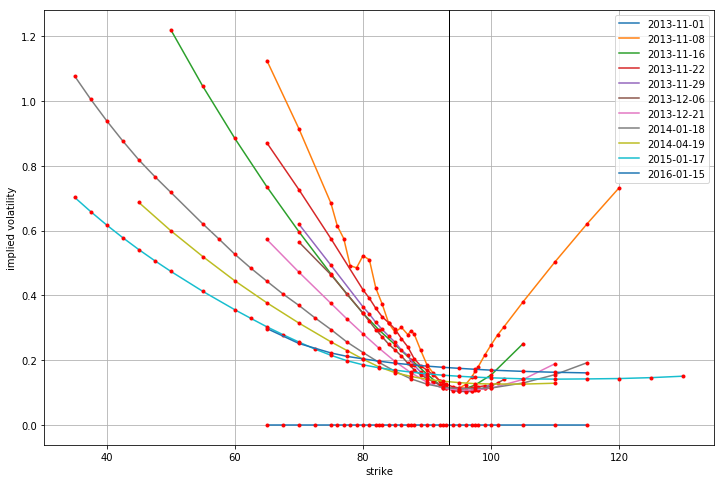

In [14]:
draw1('JNJ', 'call')

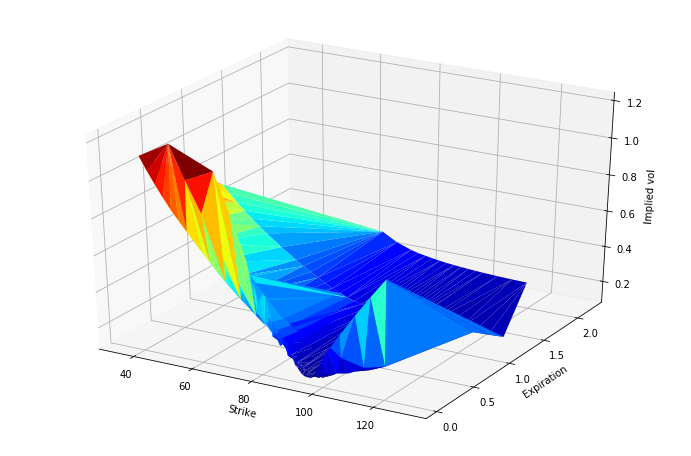

In [15]:
draw2('JNJ', 'call')

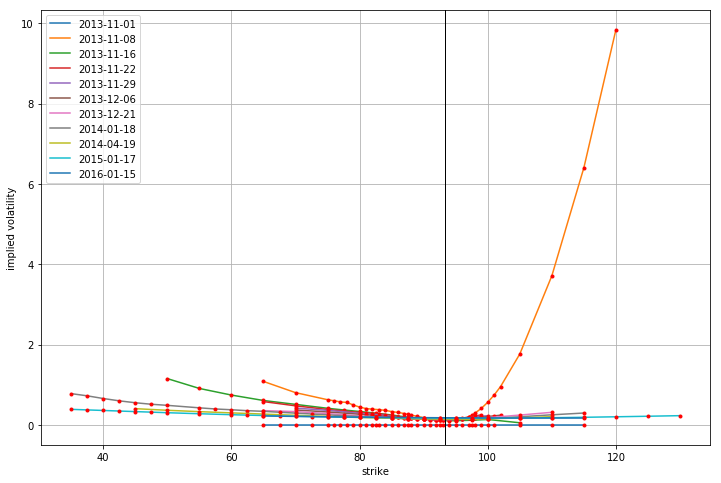

In [16]:
draw1('JNJ', 'put')

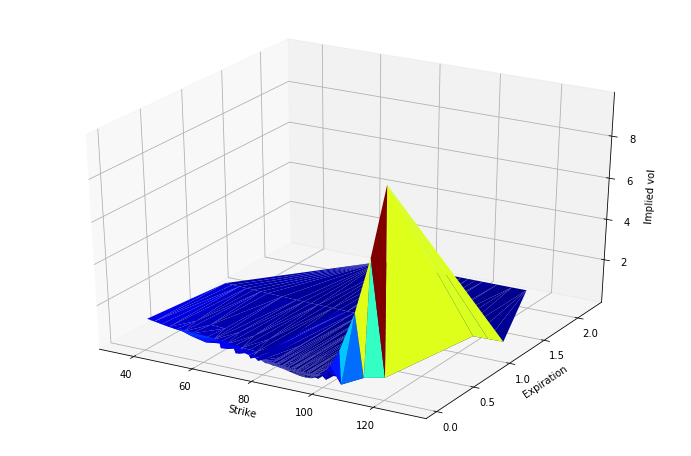

In [17]:
draw2('JNJ', 'put')

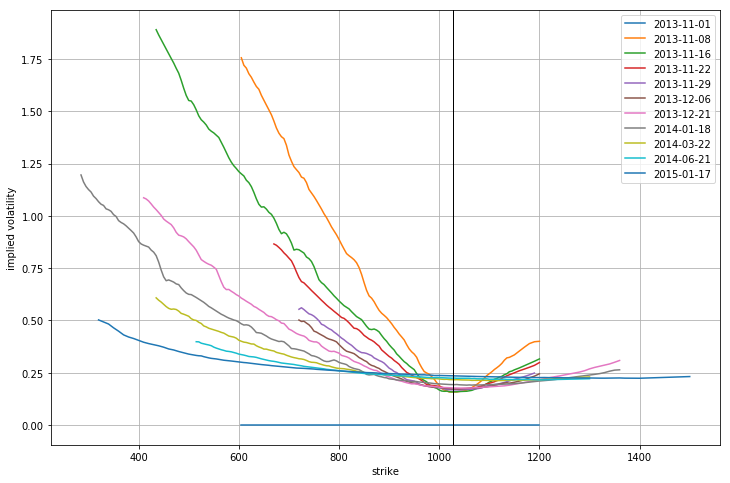

In [18]:
draw1('GOOGL', 'call', False)

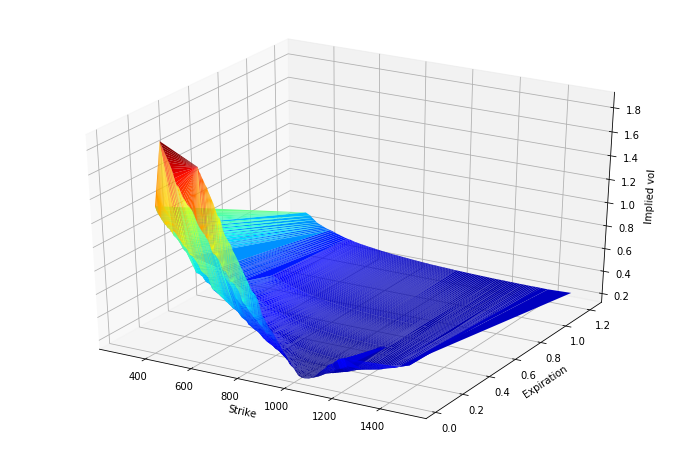

In [19]:
draw2('GOOGL', 'call', False)

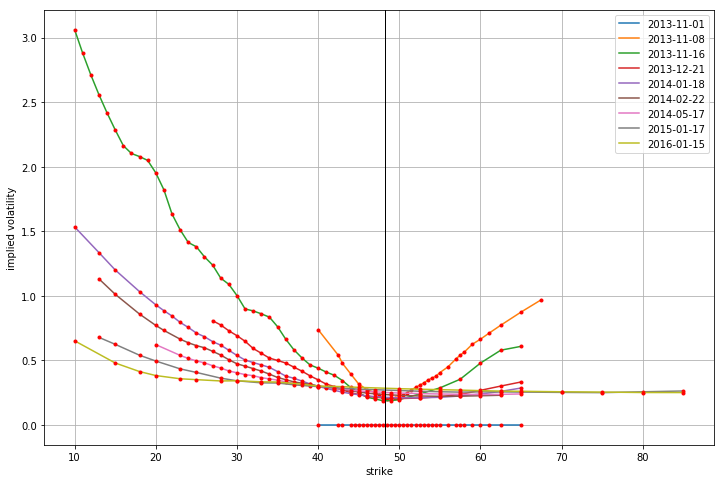

In [20]:
draw1('AIG', 'call')

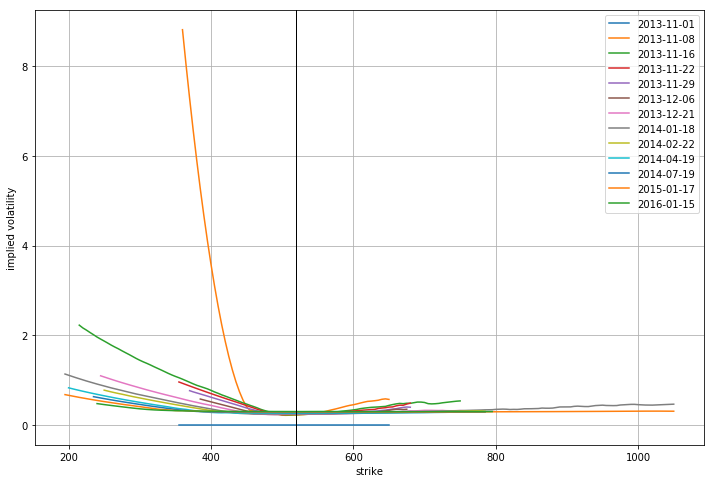

In [21]:
draw1('AAPL', 'call',False)

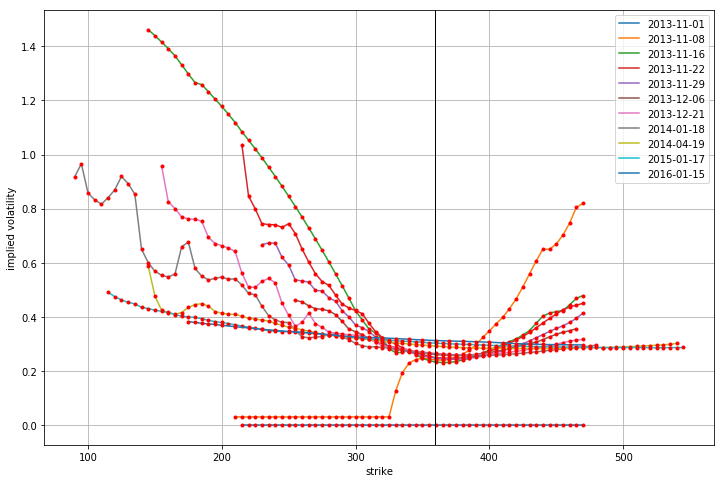

In [22]:
draw1('AMZN', 'call')

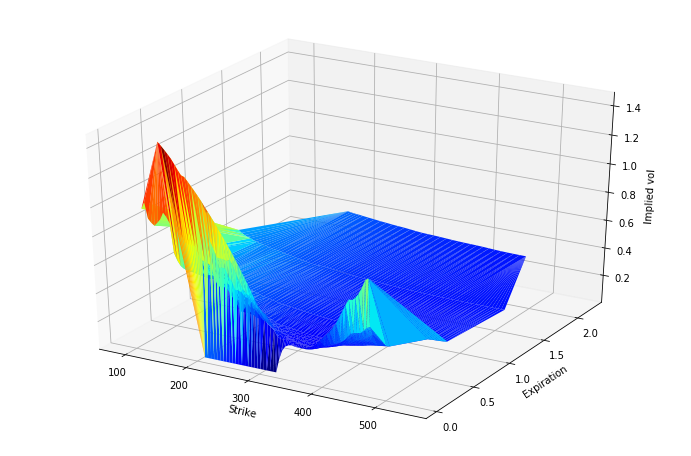

In [23]:
draw2('AMZN', 'call')

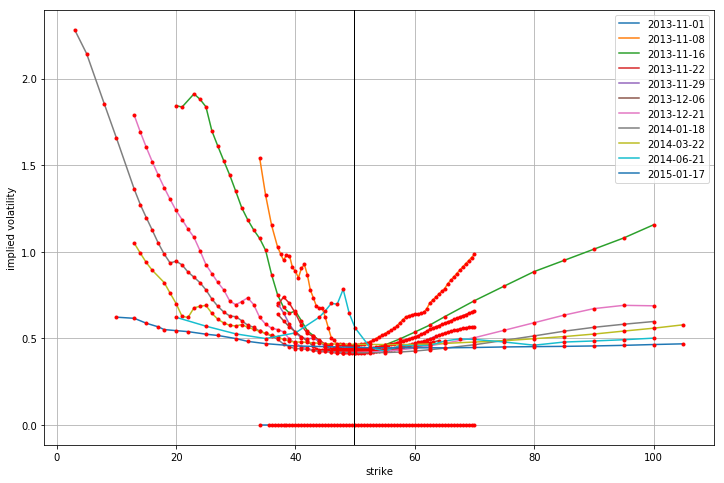

In [24]:
draw1('FB', 'call')

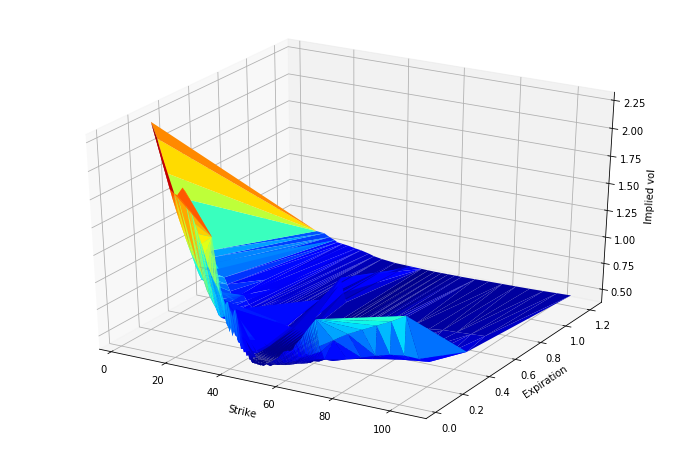

In [25]:
draw2('FB', 'call')

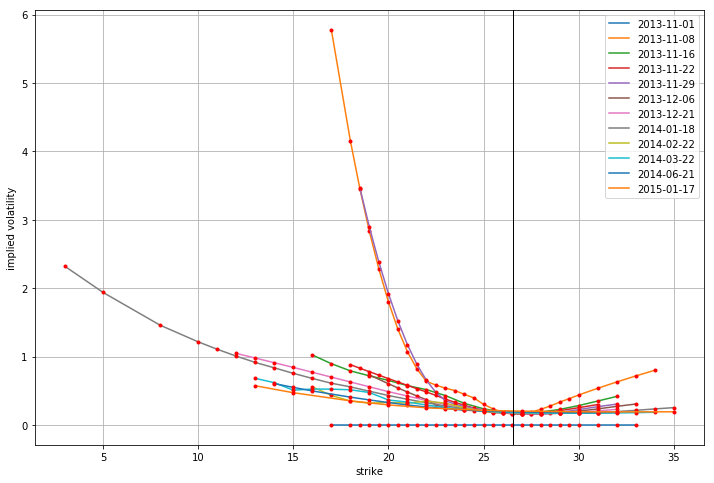

In [26]:
draw1('GE', 'call')

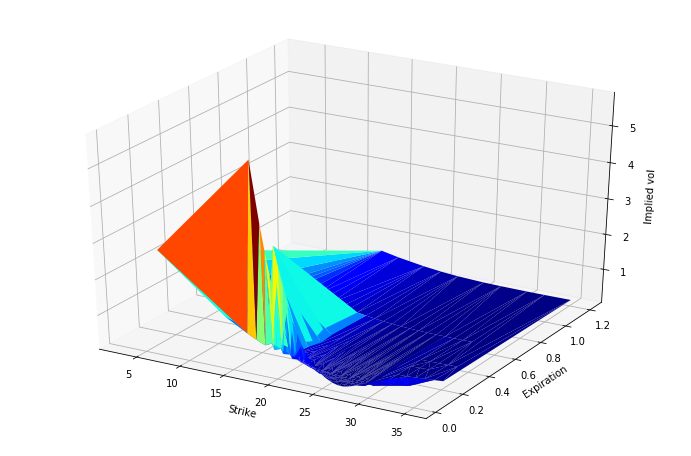

In [27]:
draw2('GE', 'call')